# Getting Started with Open CV

OpenCV is a powerful open-source library that provides a wide range of computer vision algorithms. It is released under the BSD license and offers numerous features and tools for image processing and analysis.

In this tutorial, we will explore the basic operations of OpenCV using the image dataset from scikit-learn. You can find the documentation for the image dataset [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images). By using this dataset, we will demonstrate how to perform various tasks with OpenCV, showcasing its capabilities in computer vision.

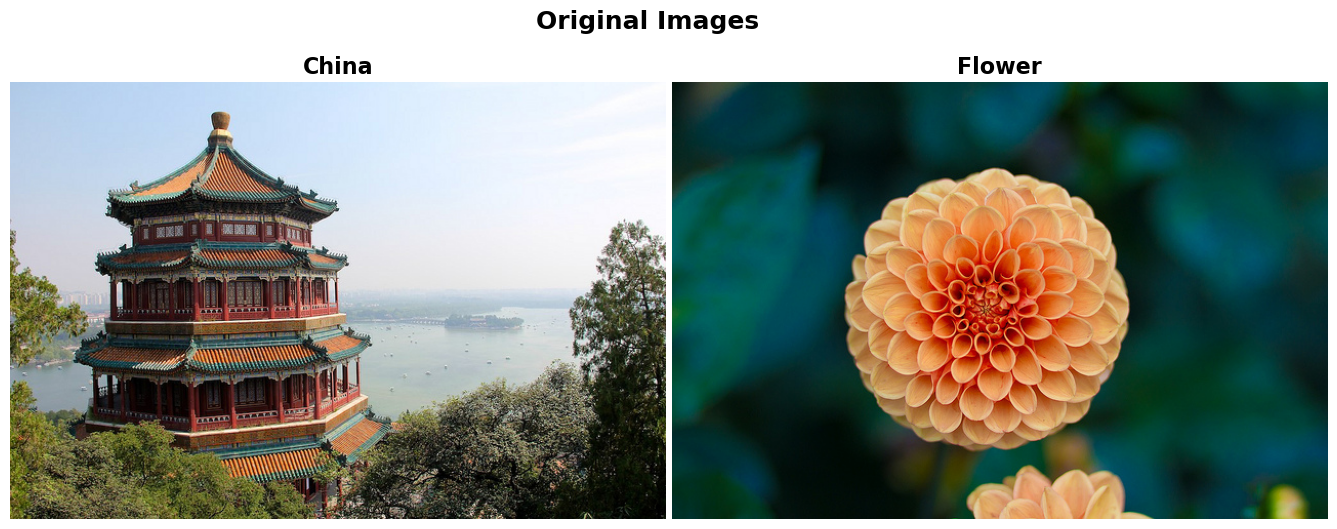

In [1]:
# sklearn datasets
from sklearn.datasets import load_sample_images
Images = load_sample_images()

Names = [x.split("\\")[-1].replace('.jpg','').title() for x in Images['filenames']]
Images = Images['images']

# matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
def ImShow(Images, Names, Title = 'Images', axis_tight = False):
    fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
    ax = ax.ravel()
    font = FontProperties()
    font.set_weight('bold')
    for i in range(2):
        _ = ax[i].imshow(Images[i])
        if axis_tight:
            _ = ax[i].axis('tight')
        _ = ax[i].set_aspect(1)
        _ = ax[i].axis('off')
        _ = ax[i].set_title(Names[i], fontproperties=font, fontsize = 16)
    _ = fig.subplots_adjust(wspace= 0.01)
    if Title:
        _ = fig.suptitle(Title, fontproperties=font, fontsize = 18)
    return fig, ax
# Image Show
_,_ = ImShow(Images, Names, Title = 'Original Images')

This code performs the following tasks:

1. It imports the necessary modules: `load_sample_images` from the `sklearn.datasets` module, `matplotlib.pyplot` and `FontProperties` from the `matplotlib.font_manager` module.

2. It loads sample images using the `load_sample_images` function from the scikit-learn (`sklearn`) library. The images are stored in the `Images` variable.

3. It extracts the names of the images by splitting the file paths and extracting the last part (filename) of each path. The names are formatted by removing the file extension (`.jpg`) and capitalizing the first letter of each word. The names are stored in the `Names` list.

4. It defines a function called `ImShow` that takes in the `Images`, `Names`, `Title`, and `axis_tight` parameters. This function is used to display images using matplotlib.

5. Inside the `ImShow` function, it creates a figure with subplots using `plt.subplots`. The figure has 1 row and 2 columns, resulting in two subplots.

6. It flattens the subplots into a 1-dimensional array using the `ax.ravel()` method.

7. It sets the font properties for the titles using the `FontProperties` class.

8. It loops over the two subplots and displays each image using `ax[i].imshow(Images[i])`. If `axis_tight` is `True`, it adjusts the axes to tightly fit the image. It also sets the aspect ratio to 1 and turns off the axes and titles for the subplots.

9. It adjusts the spacing between subplots using `fig.subplots_adjust`.

10. If a `Title` is provided, it adds a super title to the figure using `fig.suptitle`.

11. Finally, it returns the figure and axes objects.

12. The code then calls the `ImShow` function with the `Images`, `Names`, and `Title` parameters set, displaying the original images with their corresponding titles.

## Accessing and Modifying pixel values

To access and modify pixel values in an image, we can utilize the `split` function. This function enables us to separate the different color channels within an image.

In the realm of digital images, a channel corresponds to a specific color component, such as Red, Green, or Blue in the RGB color model, or Cyan, Magenta, Yellow, or Black in the CMYK color model. Each color model consists of a distinct number of channels.

By utilizing the "split" function, we can divide an image into its individual color channels, resulting in multiple images where each one represents a particular color channel.

Once the image is split into its channels, we gain the ability to access and modify the pixel values of each channel independently. This allows us to perform operations tailored to each color channel, such as adjusting brightness, contrast, or applying filters based on specific colors.

Through the manipulation of pixel values within the separate channels, we can alter the appearance and characteristics of an image, enabling us to achieve desired effects or carry out specific image processing tasks.

In [2]:
import cv2
B, G, R = cv2.split(Images[0])

Alternatively, we could use, for example, use ```Img[:,:,0]```, ```Img[:,:,1]``` and ```Img[:,:,2]``` to access the red, green and blue chanells of ```Img```.

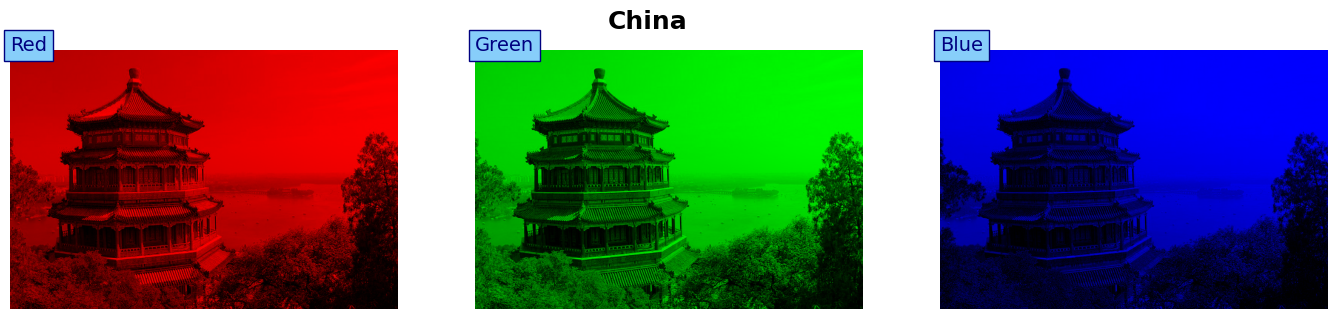

In [3]:
fig, ax = plt.subplots(1, 3 , figsize = (17, 3.5))
ax = ax.ravel()
font = FontProperties()
font.set_weight('bold')
_ = fig.suptitle(Names[0], fontproperties=font, fontsize = 18)

Channels = ['Red', 'Green', 'Blue']

for i in range(3):
    img = 0*Images[0]
    img[:,:,i] = Images[0][:,:,i]
    _ = ax[i].imshow(img)
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
    _ = ax[i].text(x = 0, y = 0, s = Channels[i], size=14,
                   color = 'Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

This code performs the following tasks:

1. It creates a figure and subplots using `plt.subplots`. The figure contains 1 row and 3 columns, resulting in three subplots. The size of the figure is set to (17, 3.5) using the `figsize` parameter.

2. The subplots are flattened into a 1-dimensional array using the `ax.ravel()` method.

3. It creates a `FontProperties` object and sets its weight to bold.

4. It adds a super title to the figure using `fig.suptitle`. The title is set to the first name in the `Names` list. The font properties are set to bold and the font size is set to 18.

5. It defines a list called `Channels` which contains the strings 'Red', 'Green', and 'Blue'.

6. It enters a loop that iterates three times, representing the three color channels.

7. Inside the loop, it creates a new image `img` initialized as a zero-filled image with the same shape as the first image in the `Images` list.

8. It assigns the corresponding color channel values from the first image to the `img` variable using `img[:,:,i] = Images[0][:,:,i]`, where `i` represents the current color channel index.

9. It displays the modified `img` in the i-th subplot using `ax[i].imshow(img)`.

10. It sets the aspect ratio of each subplot to 1 using `_ = ax[i].set_aspect(1)`.

11. It turns off the axes for each subplot using `_ = ax[i].axis('off')`.

12. It adds a text label at the coordinate (0, 0) within each subplot. The text label corresponds to the current color channel from the `Channels` list. The size of the text is set to 14, the color is set to 'Navy', and a light blue rectangular bounding box is created around the text using the `bbox` parameter.

In summary, this code creates a figure with three subplots, each displaying a single color channel (Red, Green, or Blue) of the first image in the `Images` list. The subplots are labeled with the corresponding color channel names, and the figure has a super title set to the first name in the `Names` list.

## Adding Pading

The code you provided demonstrates different border types available in OpenCV. Here is a refined and paraphrased explanation:

- The `cv2.BORDER_CONSTANT` option adds a border with a solid color.
- The `cv2.BORDER_REFLECT` option creates a border where the elements are mirrored in reflection, forming a pattern like "fedcba|abcdefgh|hgfedcb".
- The `cv2.BORDER_REFLECT_101` or `cv2.BORDER_DEFAULT` option also creates a border with mirrored reflection, but the pattern is slightly different: "gfedcb|abcdefgh|gfedcba".
- The `cv2.BORDER_REPLICATE` option replicates the last element of each row or column to create the border. The pattern would be like "aaaaaa|abcdefgh|hhhhhhh".
- The `cv2.BORDER_WRAP` option creates a border where the image is wrapped around, creating a circular-like pattern: "cdefgh|abcdefgh|abcdefg".

For more detailed information on these border types and their usage, please refer to the official documentation available [here](https://docs.opencv.org/3.4/dc/da3/tutorial_copyMakeBorder.html).

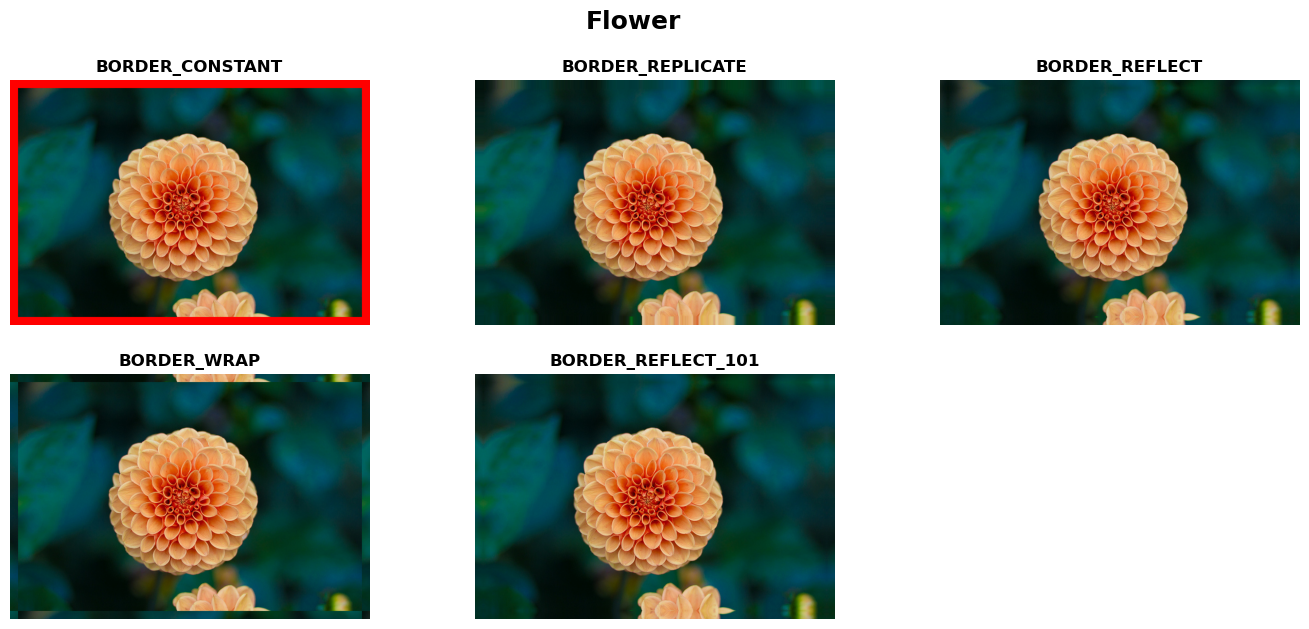

In [4]:
Dict = {cv2.BORDER_CONSTANT:'BORDER_CONSTANT',
        cv2.BORDER_REPLICATE:'BORDER_REPLICATE',
        cv2.BORDER_REFLECT:'BORDER_REFLECT',
        cv2.BORDER_WRAP:'BORDER_WRAP',
        cv2.BORDER_REFLECT_101:'BORDER_REFLECT_101'}

# RGB Colors
RGB = [[0,0,0] for i in range(3)]
for i in range(3):
    RGB[i][i] += 255

fig, ax = plt.subplots(2, 3 , figsize = (17, 7))
ax = ax.ravel()
fig.delaxes(ax[-1]) 
_ = fig.suptitle(Names[1], fontproperties=font, fontsize = 18)

for i in range(len(Dict)):
    img = cv2.copyMakeBorder(Images[1], 15, 15, 15, 15, i, value= RGB[0])
    _ = ax[i].imshow(img)
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
    _ = ax[i].set_title( Dict[i], fontproperties=font, fontsize = 12)

This code performs the following tasks:

1. The code defines a dictionary called `Dict` which maps OpenCV border type constants to their corresponding string names. Each constant is associated with a descriptive string.

2. The code initializes a 3x3 matrix called `RGB` with zeros. Each row represents the RGB values for a different color. The code then modifies the diagonal elements of the matrix by adding 255 to each element, effectively creating three different RGB colors: red, green, and blue.

3. It creates a figure and axes using `plt.subplots(2, 3, figsize=(17, 7))`, which creates a 2x3 grid of subplots (a total of 6 subplots) with the specified figure size.

4. The last subplot in the grid is removed using `fig.delaxes(ax[-1])`, making it a 2x3 grid with only 5 subplots.

5. It sets the title of the figure using `fig.suptitle(Names[1], fontproperties=font, fontsize=18)`. However, the variable `Names` is not defined in the provided code, so it seems to be missing some context.

6. The code then loops through each key in the `Dict` dictionary using `for i in range(len(Dict))`.

7. Inside the loop, it uses `cv2.copyMakeBorder()` to create a bordered version of the second image in the `Images` list. The function adds a border of 15 pixels on each side of the image using the border type specified by `i`. It uses the RGB color in the first row of the `RGB` matrix (red) as the border value.

8. It uses `ax[i].imshow(img)` to display the bordered image in the i-th subplot.

9. The code sets the aspect ratio of each subplot to 1 using `_ = ax[i].set_aspect(1)`.

10. It hides the axis labels and ticks for each subplot using `_ = ax[i].axis('off')`.

11. It sets the title of each subplot to the corresponding border type name from the `Dict` dictionary using `_ = ax[i].set_title(Dict[i], fontproperties=font, fontsize=12)`.

Overall, this code generates a grid of images with different types of borders applied to a specific image (the second image in the `Images` list) using OpenCV's `copyMakeBorder` function. The resulting images are displayed using matplotlib.

## Image Blending

To perform image blending, the OpenCV function `cv2.addWeighted` can be used. This function combines two images together in the following manner:

The resulting image is calculated as the weighted sum of two input images, denoted as `Image1` and `Image2`, along with an additional constant value `gamma`. The formula for blending is as follows:

\begin{equation}
\text{Output Image} = \alpha\,\text{Image1} + (1-\alpha)\, \text{Image2} + \gamma
\end{equation}

where $0\leq \alpha\leq 1$ and $\gamma$ is a an integer.

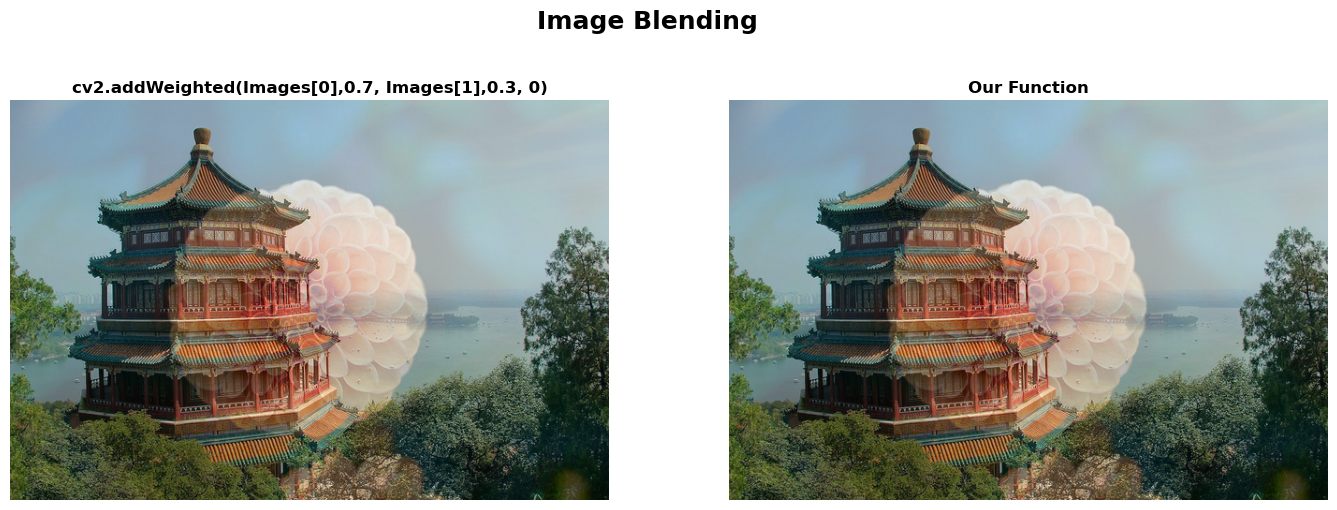

In [5]:
import numpy as np
Augmented_Images = Images.copy()
# First Method
Augmented_Images[0] = cv2.addWeighted(Images[0],0.7, Images[1],0.3, 0)
# Second Method
Augmented_Images[1] = np.round(((0.7)*Images[0] + (0.3)*Images[1])).astype('uint8') 

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Image Blending', fontproperties=font, fontsize = 18)

Title = ['cv2.addWeighted(Images[0],0.7, Images[1],0.3, 0)', 'Our Function']
for i in range(2):
    _ = ax[i].imshow(Augmented_Images[i])
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
    _ = ax[i].set_title(Title[i], fontproperties=font, fontsize = 12)

This code demonstrates two methods for image blending using OpenCV and numpy. Let's break it down step by step:

1. The code begins by importing the required libraries, numpy as np.

2. It creates a copy of the original Images array called Augmented_Images using the `copy()` function. This step ensures that the original Images array remains unchanged during the blending process.

3. The first method of image blending is performed using the `cv2.addWeighted` function. It blends the first and second images from the Images array with respective weights of 0.7 and 0.3, and an offset of 0. The resulting blended image is stored in Augmented_Images[0].

4. The second method of image blending is performed using numpy operations. It calculates the weighted sum of the first and second images from the Images array, where the weights are 0.7 and 0.3, respectively. The `np.round` function rounds the resulting image values, and the `.astype('uint8')` converts the image to the unsigned integer 8-bit data type. The resulting blended image is stored in Augmented_Images[1].

5. It creates a figure and axes using `plt.subplots(1, 2, figsize=(17, 6))`, which creates a 1x2 grid of subplots with the specified figure size.

6. It sets the title of the figure as 'Image Blending' using `_ = fig.suptitle('Image Blending', fontproperties=font, fontsize=18)`.

7. The code creates a list called Title that contains the titles for the two subplots. The first title corresponds to the method using `cv2.addWeighted`, and the second title represents the custom function using numpy.

8. Inside the loop, the code displays each blended image in the corresponding subplot using `_ = ax[i].imshow(Augmented_Images[i])`.

9. It sets the aspect ratio of each subplot to 1 using `_ = ax[i].set_aspect(1)`.

10. The axis labels and ticks are hidden for each subplot using `_ = ax[i].axis('off')`.

11. The code sets the title of each subplot based on the corresponding title from the Title list using `_ = ax[i].set_title(Title[i], fontproperties=font, fontsize=12)`.

## Bitwise Operations

The following operations are available for bitwise manipulation in OpenCV:

- **bitwise_and**: This function calculates the per-element bit-wise conjunction of two arrays or an array and a scalar. You can find more information about `bitwise_and` [here](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-and).

- **bitwise_not**: This function inverts every bit of an array, performing a per-element bitwise negation operation. To learn more about `bitwise_not`, you can refer to the documentation [here](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-not).

- **bitwise_or**: The `bitwise_or` function calculates the per-element bit-wise disjunction of two arrays or an array and a scalar. It performs a logical OR operation at each element. More details about `bitwise_or` can be found [here](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-or).

- **bitwise_xor**: This function calculates the per-element bit-wise exclusive OR (XOR) operation on two arrays or an array and a scalar. It applies a bitwise XOR operation to each element. Additional information about `bitwise_xor` can be accessed [here](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-xor).

These operations allow for manipulating the individual bits of arrays and performing logical operations, such as conjunction, negation, disjunction, and exclusive OR, at the bit level.

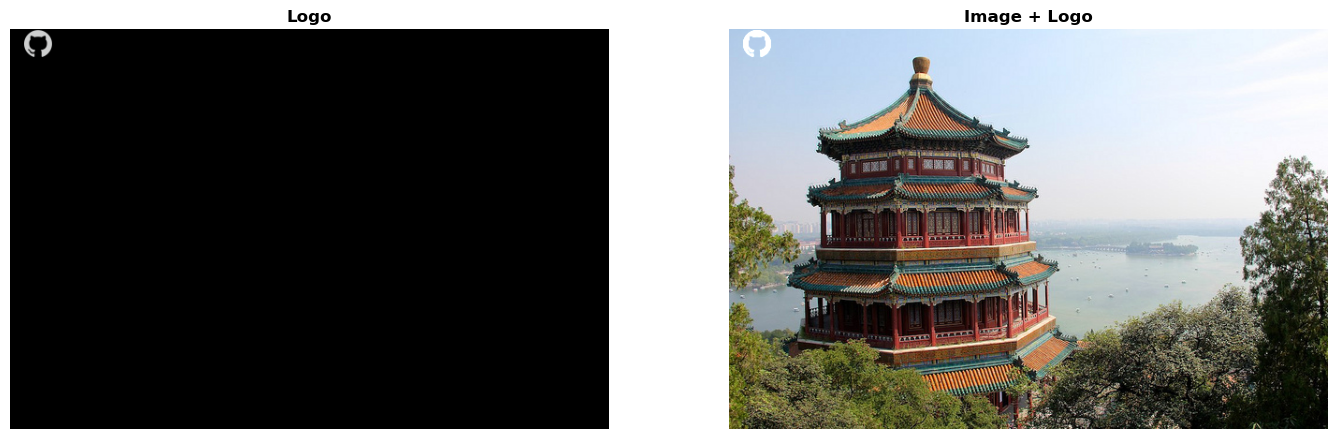

In [6]:
import numpy as np
from skimage import io
Git = io.imread('https://github.githubassets.com/images/modules/open_graph/github-mark.png')
scale = 0.05 # of original size
Git_resized = cv2.resize(Git, tuple(np.dot(scale,Git.shape[:2][::-1]).astype(int)), interpolation = cv2.INTER_AREA)

## Invert
# Git_resized =  255 - Git_resized
Git_resized = cv2.bitwise_not(Git_resized)

Img = Images[0]
Mask = 0*Img
Mask[0: Git_resized.shape[0], 0:Git_resized.shape[1],:] = Git_resized
Img = cv2.add(Img,Mask)
fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
_ = ax[0].imshow(Mask)
_ = ax[1].imshow(Img)

for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

_ = ax[0].set_title('Logo', fontproperties=font, fontsize = 12)
_ = ax[1].set_title('Image + Logo', fontproperties=font, fontsize = 12)

This code performs the following operations:

1. It imports the required libraries: numpy as np for numerical operations and skimage.io for image input/output.

2. It uses `skimage.io.imread` to read an image from a URL. The image is downloaded from 'https://github.githubassets.com/images/modules/open_graph/github-mark.png' and stored in the variable named `Git`.

3. The code defines a variable `scale` with a value of 0.05, indicating the desired scaling factor for the image.

4. It resizes the image `Git` using `cv2.resize` from OpenCV. The image is resized by multiplying the original dimensions by the `scale` value. The resulting resized image is stored in the variable `Git_resized`.

5. The code applies an inversion operation on the `Git_resized` image. Initially, the inversion is commented out (`# Git_resized = 255 - Git_resized`). Instead of directly subtracting from 255, it uses `cv2.bitwise_not` to invert the image, which calculates the bitwise negation of each pixel.

6. It selects the first image from the `Images` list and assigns it to the variable `Img`.

7. A mask image is created with the same shape as `Img` using `0*Img`. This creates an array of zeros with the same shape as `Img`.

8. The `Git_resized` image is copied onto the mask by assigning its values to the corresponding region in the `Mask` array.

9. The image `Img` and the mask `Mask` are added together using `cv2.add`, resulting in the logo being added to the original image.

10. The code creates a figure with two subplots using `plt.subplots(1, 2, figsize=(17, 6))`.

11. It displays the mask image in the first subplot using `_ = ax[0].imshow(Mask)`.

12. It displays the resulting image (`Img` with the logo added) in the second subplot using `_ = ax[1].imshow(Img)`.

13. The aspect ratio is set to 1 for both subplots using `_ = ax[i].set_aspect(1)`.

14. The axis labels and ticks are hidden for both subplots using `_ = ax[i].axis('off')`.

15. Titles are set for each subplot: 'Logo' for the first subplot and 'Image + Logo' for the second subplot.

Overall, this code downloads an image from a URL, resizes it, inverts it, and then adds it as a logo on top of another image. The resulting images (the mask and the image with the logo) are displayed in a figure with two subplots using matplotlib.

# Changing Colorspaces


Changing colorspaces in OpenCV can be accomplished using the `cvtColor` function. This function allows you to convert an image from one color space to another.

You can find more information about the `cvtColor` function [here](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor). It provides a versatile way to transform images between various color representations, such as RGB, grayscale, HSV, YUV, and more.


### RGB to Grayscale

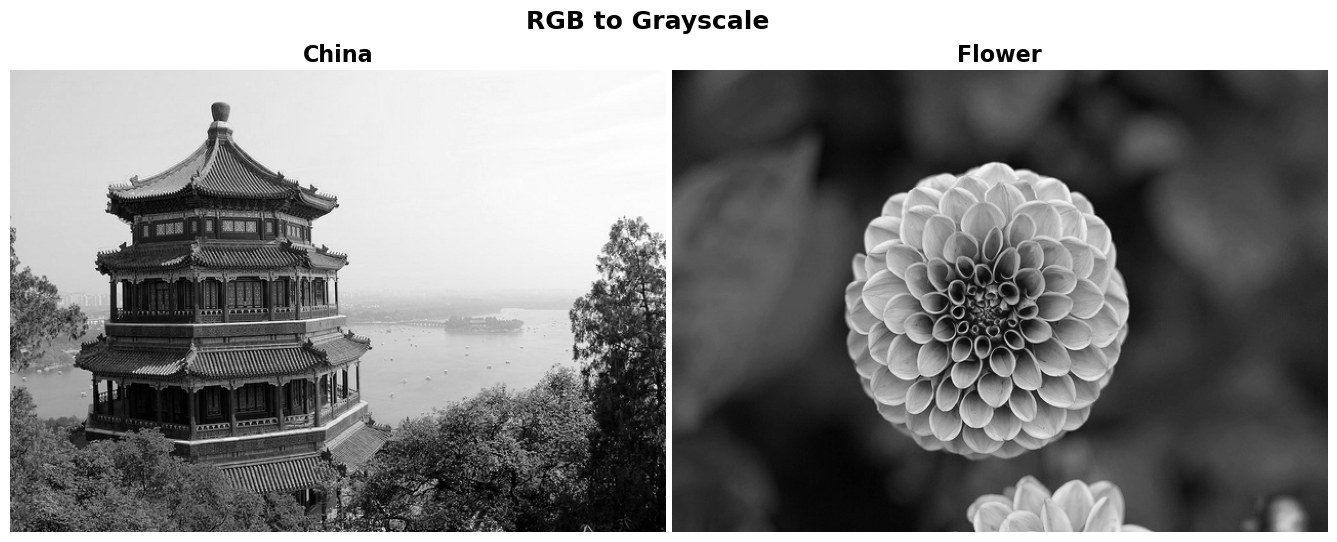

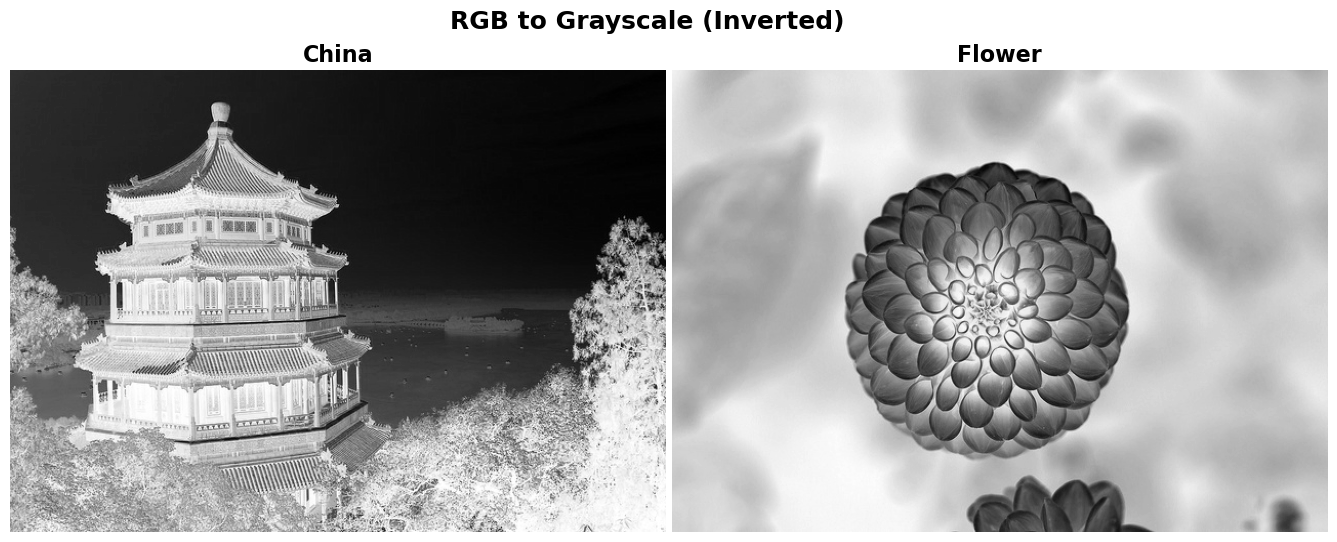

In [7]:
Augmented_Images = Images.copy()
for i in range(len(Augmented_Images)):
    Augmented_Images[i] = cv2.cvtColor(Augmented_Images[i],cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
font = FontProperties()
font.set_weight('bold')
for i in range(2):
    _ = ax[i].imshow(Augmented_Images[i],'gray')
    _ = ax[i].axis('tight')
    _ = ax[i].axis('off')
    _ = ax[i].set_title(Names[i], fontproperties=font, fontsize = 16)
_ = fig.subplots_adjust(wspace= 0.01)
_ = fig.suptitle('RGB to Grayscale', fontproperties=font, fontsize = 18)
        

Augmented_Images = Images.copy()
for i in range(len(Augmented_Images)):
    Augmented_Images[i] = cv2.bitwise_not(cv2.cvtColor(Augmented_Images[i],cv2.COLOR_BGR2GRAY))

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
for i in range(2):
    _ = ax[i].imshow(Augmented_Images[i],'gray')
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('tight')
    _ = ax[i].axis('off')
    _ = ax[i].set_title(Names[i], fontproperties=font, fontsize = 16)
    
_ = fig.subplots_adjust(wspace= 0.01)
_ = fig.suptitle('RGB to Grayscale (Inverted)', fontproperties=font, fontsize = 18)

The given code snippet performs image augmentation by converting RGB images to grayscale using the OpenCV library. It then displays the original grayscale images and the inverted grayscale images using matplotlib.

Here's a breakdown of the code:

1. `Augmented_Images = Images.copy()`: Creates a copy of the original image array called `Augmented_Images`.

2. `for i in range(len(Augmented_Images)):`: Iterates over each image in `Augmented_Images`.

3. `Augmented_Images[i] = cv2.cvtColor(Augmented_Images[i],cv2.COLOR_BGR2GRAY)`: Converts the `i`-th image in `Augmented_Images` from BGR (Blue-Green-Red) color space to grayscale using the `cv2.cvtColor` function from OpenCV.

4. `fig, ax = plt.subplots(1, 2 , figsize = (17, 6))`: Creates a figure with two subplots using matplotlib.

5. `ax = ax.ravel()`: Flattens the `ax` array for easier indexing.

6. `for i in range(2):`: Iterates over the two subplots.

7. `_ = ax[i].imshow(Augmented_Images[i],'gray')`: Displays the `i`-th grayscale image on the `i`-th subplot.

8. `_ = ax[i].axis('tight')`: Adjusts the subplot axes to tightly fit the displayed image.

9. `_ = ax[i].axis('off')`: Turns off the axis labels and ticks for the subplot.

10. `_ = ax[i].set_title(Names[i], fontproperties=font, fontsize = 16)`: Sets the title of the subplot using the corresponding name from the `Names` array.

11. `_ = fig.subplots_adjust(wspace= 0.01)`: Adjusts the spacing between subplots.

12. `_ = fig.suptitle('RGB to Grayscale', fontproperties=font, fontsize = 18)`: Sets the overall title of the figure.

13. The code then repeats the same process but with an additional step of inverting the grayscale images using the `cv2.bitwise_not` function. The resulting inverted grayscale images are displayed in a separate figure.

Overall, this code demonstrates how to convert RGB images to grayscale and display the results using matplotlib. It can be used as a simple image augmentation technique or for visualizing grayscale representations of images.

### RGB to HSV

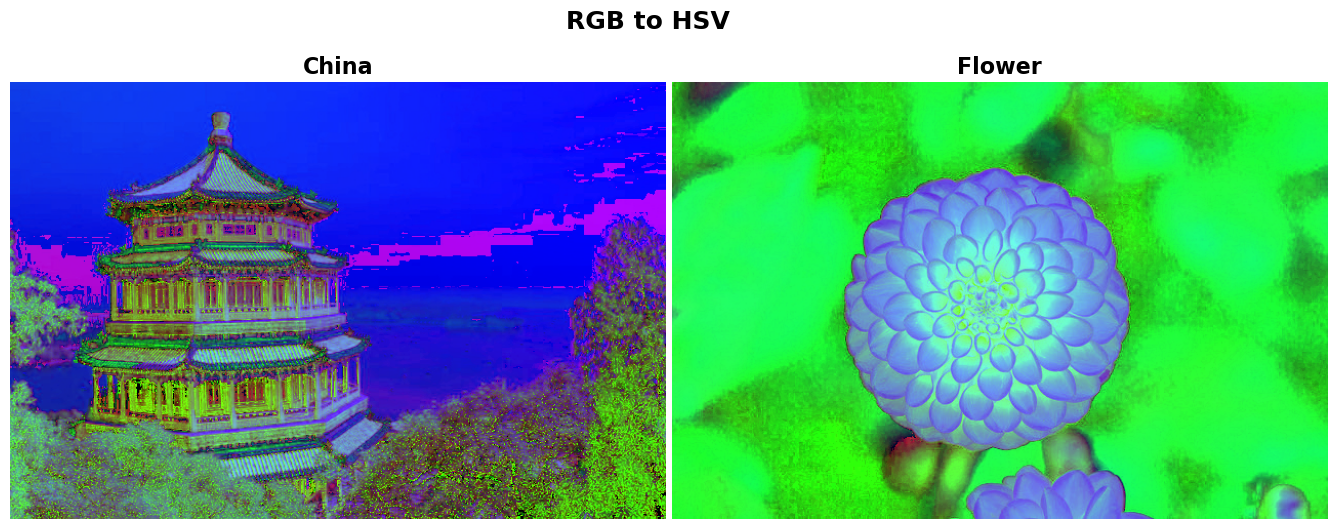

In [8]:
Augmented_Images = Images.copy()
for i in range(len(Augmented_Images)):
    Augmented_Images[i] = cv2.cvtColor(Augmented_Images[i],cv2.COLOR_BGR2HSV)
_,_ = ImShow(Augmented_Images, Names, Title = 'RGB to HSV')

***

## Refrences
1. [OpenCV documentation](https://docs.opencv.org/2.4/index.html)
2. [OpenCV-Python Tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html#opencv-python-tutorials)
***